# Clustering 2

In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn import datasets
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
from sklearn.manifold import TSNE

## 1. PCA

In [3]:
#iris 데이터 불러와서 DataFrame으로 저장
data_iris = datasets.load_iris()
df_iris = pd.DataFrame(data = data_iris["data"], columns = data_iris["feature_names"])
label_iris = data_iris["target"]

In [4]:
df_iris.head()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm)
0,5.1,3.5,1.4,0.2
1,4.9,3.0,1.4,0.2
2,4.7,3.2,1.3,0.2
3,4.6,3.1,1.5,0.2
4,5.0,3.6,1.4,0.2


In [5]:
label_iris[:5]

array([0, 0, 0, 0, 0])

In [6]:
# iris 데이터프레임 정규화
# 정규화를 통해 각 차원을 동일한 크기로 축소해 줌

scaler = StandardScaler()

new_cols = [x.split(" (cm)")[0] for x in df_iris.columns]
df_iris_s = pd.DataFrame(data = scaler.fit_transform(df_iris), columns = new_cols)

In [7]:
df_iris_s.head()

,sepal length,sepal width,petal length,petal width
0,-0.900681,1.019004,-1.340227,-1.315444
1,-1.143017,-0.131979,-1.340227,-1.315444
2,-1.385353,0.328414,-1.397064,-1.315444
3,-1.506521,0.098217,-1.283389,-1.315444
4,-1.021849,1.249201,-1.340227,-1.315444


In [8]:
# PCA 진행
# 주성분 2개 = 차원을 2개로 축소

pca = PCA(n_components = 2)
df_iris_pca = pd.DataFrame(data= pca.fit_transform(df_iris_s), columns = ['pc1', 'pc2'])
df_iris_pca["label"] = label_iris

In [9]:
df_iris_pca.head()

,pc1,pc2,label
0,-2.264703,0.480027,0
1,-2.080961,-0.674134,0
2,-2.364229,-0.341908,0
3,-2.299384,-0.597395,0
4,-2.389842,0.646835,0


In [10]:
# PCA 결과가 분산을 얼마나 보존하고 있는지 확인
pca.explained_variance_ratio_

array([0.72962445, 0.22850762])

- 첫 번째 주성분은 원래 차원의 73% 정도 가지고 있음
- 두 번째 주성분은 원래 차원의 23% 정도 가지고 있음
- 96% -> 차원축소가 잘 됐다고 판단 가능

In [11]:
# PC(주성분)에서 기존 변수들의 선형 관계가 어떻게 나타나는지 확인
pca.components_

array([[ 0.52106591, -0.26934744,  0.5804131 ,  0.56485654],
       [ 0.37741762,  0.92329566,  0.02449161,  0.06694199]])

In [12]:
# PC(주성분)에서 기존 변수들의 선형 관계가 어떻게 나타나는지 확인
print([np.dot(pca.components_[0], df_iris_s.loc[0]), np.dot(pca.components_[1], df_iris_s.loc[0])])

# 선형 관계 확인
print(df_iris_pca.loc[0].to_list())

[-2.264702808807589, 0.4800265965209859]
[-2.2647028088075967, 0.48002659652098845, 0.0]


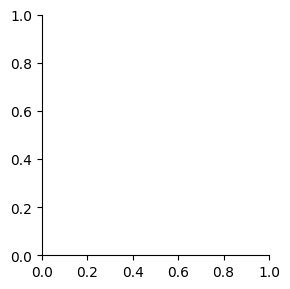

In [13]:
# PCA 시각화 with seaborn

g = sns.FacetGrid(df_iris_pca, )